# First lets get our data!

In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Using TensorFlow backend.


# Let's look at some of our data

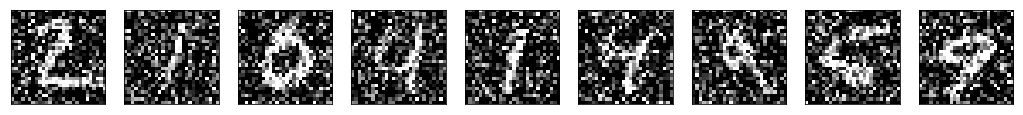

In [3]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt ##wsm 


n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n): ##wsm changed from for i in range(n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Let's create our machine learning architecture

Here we're creating an Autoencoder architecture


In [4]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Let's Train our Model...

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0979 - val_loss: 0.0967
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0976 - val_loss: 0.0975
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0975 - val_loss: 0.0968
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0974 - val_loss: 0.0977
Epoch 5/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0973 - val_loss: 0.0970
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0972 - val_loss: 0.0961
Epoch 7/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0970 - val_loss: 0.0961
Epoch 8/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.0969 - val_loss: 0.0972
Epoch 9/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0968 - val_loss: 0.0958
Epoch

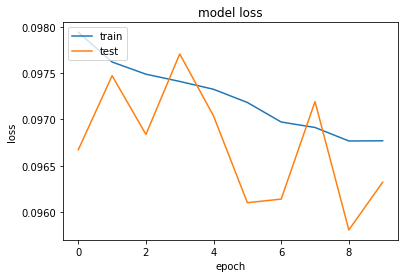

In [8]:
from keras.callbacks import TensorBoard

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/data/scratch/wsmonroe', histogram_freq=0, write_graph=False)])


print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# How'd we do?

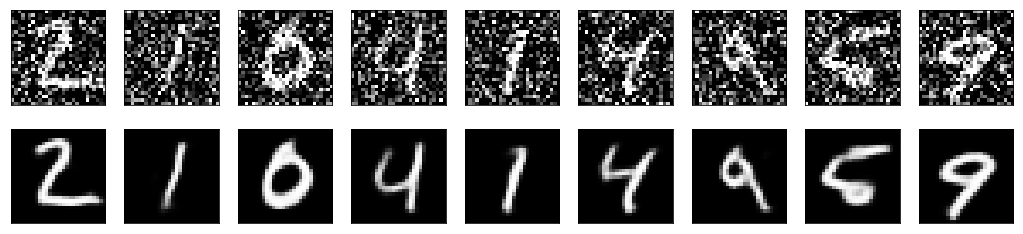

In [9]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()